# Photon Coefficients Calculator for Photoactive or Prism Reactions   

## **1.** Import the required packages 

In [162]:
# Import library
from scipy.interpolate import interp1d
from pathlib import Path
import csv
import pandas
import matplotlib.pyplot as plt
import numpy as np

## 2. Import The Data in csv File

In [163]:
# 'Beta-Carotene - Chla Action Spectrum', 'LHCI Absorption Spectrum', 'LHCII Absorption Spectrum', 'Chla Absorption Spectrum', 'OEC Photoinhibition Action Spectra', 'Protochlorophyllide photoreductase Absorption Spectrum', 'Divinyl Protochlorophyllide photoreductase Absorption Spectrum', 'Rhodopsin photoisomerase Activity Spectrum', 'Vitamin D3 Synthesis Activity Spectrum', 'Xanthophylls Action Absorption '

Here = Path().absolute()
NameDir = '/Photoactive Reactions/'
RxnName = 'Zeaxanthin emission spectra'
NameFile = NameDir + RxnName
Data_File = str(Here) + NameFile + '.csv'
print(Data_File)
typeR = 'PrismReaction'
rxnID = 'DEXZEAX'

/mnt/c/users/flron/OneDrive/Tesis/Cobrapy Model Development/Models Test/Model Chlorella Analysis/Photoactive Reactions/Zeaxanthin emission spectra.csv


##### Creating lists from a .csv file

In [164]:
with open(Data_File, "r", encoding="utf-8") as f:
    lector = csv.reader(f, delimiter=',')
    # Omit header
    # next(lector, None)
    # Create a list for each column
    wavelength = []
    flux = []
    for row in lector:
        wavelength.append(float(row[0]))
        #Column in file to take data
        flux.append(float(row[1]))
  

<p style="font-size:10pt">Sorting the data</p> 

In [165]:
def sort_list(list1, list2):
 
    zipped_pairs = zip(list2, list1)
 
    z = [x for _, x in sorted(zipped_pairs)]
     
    return z

flux = sort_list(flux, wavelength)
wavelength = sorted(wavelength)

### **3.** Data interpolation

<p style="font-size:10pt">Complement the wavelenght ranges between 250 to 760 nm with 0 Flux</p> 

In [166]:
steps = 6

if wavelength[0] > 250:
    lowerRange = wavelength[0] - 250
    lowerh = lowerRange/steps
    InitWavelength = [250 + i*lowerh for i in range(steps)]
    InitFlux = [0 for i in range(steps)]
else:
    InitWavelength = []
    InitFlux = []

if wavelength[-1] < 760:
    UpperRange = 760 - wavelength[-1]
    Upperh = UpperRange/steps
    FinalWavelength = [wavelength[-1] + (i+1)*Upperh for i in range(steps)]
    FinalFlux = [0 for i in range(steps)]
else:
    FinalWavelength = []
    FinalFlux = []

wavelength = InitWavelength + wavelength + FinalWavelength
flux = InitFlux + flux + FinalFlux

<p style="font-size:10pt">Find the minimal step as difference among two data on x-axis</p>

In [167]:
# List with wavelength values
DiffList = []

for i in range(0, len(wavelength)-1):
    dif = wavelength[i+1] - wavelength[i]
    DiffList.append(dif)

h = round(min([value for value in DiffList if value!=0]),8)
print(f'The step value is = {h}')

The step value is = 2.0


<p style="font-size:10pt">Generate a new wavelenght vector with a constant step</p>

In [168]:
new_w = [wavelength[0]]

while new_w[-1] < wavelength[-1]:
    w = round(new_w[-1] + h,8)
    if w < wavelength[-1]:
        new_w.append(w)
    else:
        break

<p style="font-size:10pt">Generation of an interpolation vector of respective data</p> 

In [169]:
interpolate = interp1d(wavelength, flux, kind='linear')

# List with interpolated flux values
new_f = interpolate(new_w)

# See interpolated data
for i in range(len(new_w)):
    print(f'wavelength = {new_w[i]}, flux = {new_f[i]}')

wavelength = 250.0, flux = 0.0
wavelength = 252.0, flux = 0.0
wavelength = 254.0, flux = 0.0
wavelength = 256.0, flux = 0.0
wavelength = 258.0, flux = 0.0
wavelength = 260.0, flux = 0.0
wavelength = 262.0, flux = 0.0
wavelength = 264.0, flux = 0.0
wavelength = 266.0, flux = 0.0
wavelength = 268.0, flux = 0.0
wavelength = 270.0, flux = 0.0
wavelength = 272.0, flux = 0.0
wavelength = 274.0, flux = 0.0
wavelength = 276.0, flux = 0.0
wavelength = 278.0, flux = 0.0
wavelength = 280.0, flux = 0.0
wavelength = 282.0, flux = 0.0
wavelength = 284.0, flux = 0.0
wavelength = 286.0, flux = 0.0
wavelength = 288.0, flux = 0.0
wavelength = 290.0, flux = 0.0
wavelength = 292.0, flux = 0.0
wavelength = 294.0, flux = 0.0
wavelength = 296.0, flux = 0.0
wavelength = 298.0, flux = 0.0
wavelength = 300.0, flux = 0.0
wavelength = 302.0, flux = 0.0
wavelength = 304.0, flux = 0.0
wavelength = 306.0, flux = 0.0
wavelength = 308.0, flux = 0.0
wavelength = 310.0, flux = 0.0
wavelength = 312.0, flux = 0.0
waveleng

<p style="font-size:10pt">Print the Interpolated Data</p> 

In [170]:
with open(str(Here) + NameFile + "_Interpolated.csv", "w", encoding="utf-8") as f:
    for w in new_w:
        f.write("%f, %f %s" % (w, new_f[new_w.index(w)],"\n"))

### **4.** Function - Simpson's 3/8 Rule 

<p style="font-size:10pt">Simpson's 3/8 Integration</p> 

In [171]:
def simpson38(x, y):
    # x, list which contains values of the independent variable
    # y, list which contains values of the dependent variable

    # calculating step size
    data_pairs = len(x)-1
    h = (x[-1] - x[0]) / data_pairs
    integration = y[0] + y[-1]
    
    for i in range(1,data_pairs):
        k = x[0] + i*h
        if i%2 == 0 and k in x:
            integration = integration + 2 * round(y[x.index(k)], 8)
        elif i%2 == 0 and k in x == False:
            integration = integration + 2 * round(y[i], 8)
        elif i%2 != 0 and k in x:
            integration = integration + 3 * round(y[x.index(k)], 8)
        else:
            integration = integration + 3 * round(y[i], 8)
    
    # Finding final integration value
    integration = integration * 3 * h / 8
    
    return integration

<p style="font-size:10pt">Defining the Photon vector</p> 

In [172]:
photStep = 30
PhotonVect = {'photon'+str(int(250 + (i+0.5)*photStep)): {"low":250+i*photStep, "up":250+(i+1)*photStep} for i in range(int(500/photStep)+1)}

# RxnDicts = PhotonVect.copy()

PhotonVect

{'photon265': {'low': 250, 'up': 280},
 'photon295': {'low': 280, 'up': 310},
 'photon325': {'low': 310, 'up': 340},
 'photon355': {'low': 340, 'up': 370},
 'photon385': {'low': 370, 'up': 400},
 'photon415': {'low': 400, 'up': 430},
 'photon445': {'low': 430, 'up': 460},
 'photon475': {'low': 460, 'up': 490},
 'photon505': {'low': 490, 'up': 520},
 'photon535': {'low': 520, 'up': 550},
 'photon565': {'low': 550, 'up': 580},
 'photon595': {'low': 580, 'up': 610},
 'photon625': {'low': 610, 'up': 640},
 'photon655': {'low': 640, 'up': 670},
 'photon685': {'low': 670, 'up': 700},
 'photon715': {'low': 700, 'up': 730},
 'photon745': {'low': 730, 'up': 760}}

### **5.** Integrate the Results

<p style="font-size:10pt">Finding the Whole Integral</p> 

In [173]:
# Integral value usign Simpson's 3/8 Rule
integral = simpson38(new_w, new_f)
print(f'Simpson 3/8 integral = {integral}')

# Integral value usign Scipy method
from scipy import integrate
integral_2 = integrate.simpson(new_f, new_w)
print(f'scipy integral = {integral_2}')

print ('Error: %f' % (100*abs(integral_2-integral)/integral))

Simpson 3/8 integral = 208.43971386153436
scipy integral = 222.335499863931
Error: 6.666573


<p style="font-size:10pt">Integration by wavelength range</p> 

In [174]:
integralTotal = 0

for j, k in PhotonVect.items():
    low_w = k.get('low')
    high_w= k.get('up')
    
    low_index = 0
    while new_w[low_index] < low_w:
        low_index += 1

    high_index = 0
    while new_w[high_index] < high_w :
        if not high_index == len(new_w)-1:
            high_index += 1
        else:
            break
    
    integralPhoton = simpson38(new_w[low_index:high_index], new_f[low_index:high_index])
    PhotonVect[j] = k | {"Integral":integralPhoton} 
    print(f'Photon vector = {j},  low limit = {low_w}, high limit = {high_w}, Simpson 3/8 integral = {integralPhoton}')
    integralTotal += integralPhoton

print(f'Total integral = {integralTotal}')

Photon vector = photon265,  low limit = 250, high limit = 280, Simpson 3/8 integral = 0.0
Photon vector = photon295,  low limit = 280, high limit = 310, Simpson 3/8 integral = 0.0
Photon vector = photon325,  low limit = 310, high limit = 340, Simpson 3/8 integral = 0.0
Photon vector = photon355,  low limit = 340, high limit = 370, Simpson 3/8 integral = 0.0
Photon vector = photon385,  low limit = 370, high limit = 400, Simpson 3/8 integral = 0.0
Photon vector = photon415,  low limit = 400, high limit = 430, Simpson 3/8 integral = 0.0
Photon vector = photon445,  low limit = 430, high limit = 460, Simpson 3/8 integral = 0.0
Photon vector = photon475,  low limit = 460, high limit = 490, Simpson 3/8 integral = 7.471625914957804
Photon vector = photon505,  low limit = 490, high limit = 520, Simpson 3/8 integral = 19.844179387245298
Photon vector = photon535,  low limit = 520, high limit = 550, Simpson 3/8 integral = 25.03337632601444
Photon vector = photon565,  low limit = 550, high limit =

<p style="font-size:10pt">Getting Stoichiometric coefficients</p> 

In [175]:
coeff = []

if typeR == 'PhotoReaction':
    for j, k in PhotonVect.items():
        PhotoActiveArea = k.get('Integral')
        lowL = k.get('low')
        upL = k.get('up')
        if PhotoActiveArea != 0:
            coeff.append(PhotoActiveArea/(upL - lowL))
        else:
            coeff.append(0)
    
    max_coeff = max([abs(c) for c in coeff])
    coeff = [abs(c)/max_coeff for c in coeff]
elif typeR == 'PrismReaction':
    for j, k in PhotonVect.items():
        PhotoActiveArea = k.get('Integral')
        coeff.append(PhotoActiveArea/integralTotal)

count = 0

for j, k in PhotonVect.items():
    PhotonVect[j] = k | {"Coefficient":coeff[count]}
    count += 1

PhotonVect

{'photon265': {'low': 250, 'up': 280, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon295': {'low': 280, 'up': 310, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon325': {'low': 310, 'up': 340, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon355': {'low': 340, 'up': 370, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon385': {'low': 370, 'up': 400, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon415': {'low': 400, 'up': 430, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon445': {'low': 430, 'up': 460, 'Integral': 0.0, 'Coefficient': 0.0},
 'photon475': {'low': 460,
  'up': 490,
  'Integral': 7.471625914957804,
  'Coefficient': 0.041018369196496145},
 'photon505': {'low': 490,
  'up': 520,
  'Integral': 19.844179387245298,
  'Coefficient': 0.10894226849312531},
 'photon535': {'low': 520,
  'up': 550,
  'Integral': 25.03337632601444,
  'Coefficient': 0.13743036442973275},
 'photon565': {'low': 550,
  'up': 580,
  'Integral': 25.816547022978757,
  'Coefficient': 0.14172988171788395},
 'photon595': {'l

### **6.** Print the coefficcients for each reaction in a file

In [176]:
for photon in PhotonVect.keys():
    RxnDicts[photon][RxnName] = PhotonVect[photon]['Coefficient']

RxnDicts['ID'][RxnName] = rxnID
RxnDicts

{'photon265': {'low': 250,
  'up': 280,
  'Beta-Carotene - Chla Action Spectrum': 0.0,
  'LHCI Absorption Spectrum': 0.0,
  'LHCII Absorption Spectrum': 0.0,
  'Chla Absorption Spectrum': 0.0,
  'OEC Photoinhibition Action Spectra': 1.0,
  'Protochlorophyllide photoreductase Absorption Spectrum': 0.0,
  'Divinyl Protochlorophyllide photoreductase Absorption Spectrum': 0.0,
  'Rhodopsin photoisomerase Activity Spectrum': 0.0,
  'Vitamin D3 Synthesis Activity Spectrum': 0.21325445332461856,
  'Xanthophylls Action Absorption ': 0.0,
  'Zeaxanthin emission spectra': 0.0},
 'photon295': {'low': 280,
  'up': 310,
  'Beta-Carotene - Chla Action Spectrum': 0.0,
  'LHCI Absorption Spectrum': 0.0,
  'LHCII Absorption Spectrum': 0.0,
  'Chla Absorption Spectrum': 0.0,
  'OEC Photoinhibition Action Spectra': 0.7764506353802504,
  'Protochlorophyllide photoreductase Absorption Spectrum': 0.0,
  'Divinyl Protochlorophyllide photoreductase Absorption Spectrum': 0.0,
  'Rhodopsin photoisomerase Activi

In [177]:
Reactions = ['Beta-Carotene - Chla Action Spectrum', 'LHCI Absorption Spectrum', 'LHCII Absorption Spectrum', 'Chla Absorption Spectrum', 'OEC Photoinhibition Action Spectra', 'Protochlorophyllide photoreductase Absorption Spectrum', 'Divinyl Protochlorophyllide photoreductase Absorption Spectrum', 'Rhodopsin photoisomerase Activity Spectrum', 'Vitamin D3 Synthesis Activity Spectrum', 'Xanthophylls Action Absorption ']

RxnDictsNorm ={}

for photon, dict_i in RxnDicts.items():
    RxnDictsNorm[photon] = {}
    sum = 0
    for key in dict_i.keys():
        if key in Reactions and photon != 'ID':
            sum = sum + RxnDicts[photon].get(key)
    
    for key in dict_i.keys():
        if key in Reactions:
            if RxnDicts[photon][key] != 0 and photon != 'ID':
                coef = sum / RxnDicts[photon][key]
            elif photon != 'ID':
                coef = 0
            else:
                coef = RxnDicts[photon][key]
            
            if photon == 'ID':
                RxnDictsNorm[photon][key + ' (N)'] = coef
            elif coef <= 400:
                RxnDictsNorm[photon][key + ' (N)'] = coef
            else:
                RxnDictsNorm[photon][key + ' (N)'] = 0

        else:
            RxnDictsNorm[photon][key] = RxnDicts[photon][key]
            
RxnDictsNorm

{'photon265': {'low': 250,
  'up': 280,
  'Beta-Carotene - Chla Action Spectrum (N)': 0,
  'LHCI Absorption Spectrum (N)': 0,
  'LHCII Absorption Spectrum (N)': 0,
  'Chla Absorption Spectrum (N)': 0,
  'OEC Photoinhibition Action Spectra (N)': 1.2132544533246186,
  'Protochlorophyllide photoreductase Absorption Spectrum (N)': 0,
  'Divinyl Protochlorophyllide photoreductase Absorption Spectrum (N)': 0,
  'Rhodopsin photoisomerase Activity Spectrum (N)': 0,
  'Vitamin D3 Synthesis Activity Spectrum (N)': 5.689233844405527,
  'Xanthophylls Action Absorption  (N)': 0,
  'Zeaxanthin emission spectra': 0.0},
 'photon295': {'low': 280,
  'up': 310,
  'Beta-Carotene - Chla Action Spectrum (N)': 0,
  'LHCI Absorption Spectrum (N)': 0,
  'LHCII Absorption Spectrum (N)': 0,
  'Chla Absorption Spectrum (N)': 0,
  'OEC Photoinhibition Action Spectra (N)': 2.287911883168556,
  'Protochlorophyllide photoreductase Absorption Spectrum (N)': 0,
  'Divinyl Protochlorophyllide photoreductase Absorption 

,low,up,Beta-Carotene - Chla Action Spectrum (N),LHCI Absorption Spectrum (N),LHCII Absorption Spectrum (N),Chla Absorption Spectrum (N),OEC Photoinhibition Action Spectra (N),Protochlorophyllide photoreductase Absorption Spectrum (N),Divinyl Protochlorophyllide photoreductase Absorption Spectrum (N),Rhodopsin photoisomerase Activity Spectrum (N),Vitamin D3 Synthesis Activity Spectrum (N),Xanthophylls Action Absorption (N),Zeaxanthin emission spectra
photon265,250.0,280.0,0.0,0.0,0.0,0.0,1.213254,0.0,0.0,0.0,5.689234,0.0,0.0
photon295,280.0,310.0,0.0,0.0,0.0,0.0,2.287912,0.0,0.0,0.0,1.776451,0.0,0.0
photon325,310.0,340.0,0.0,0.0,0.0,0.0,1.064866,0.0,0.0,0.0,16.416492,0.0,0.0
photon355,340.0,370.0,0.0,5.162298,4.069445,4.069445,3.197399,0.0,0.0,0.0,0.0,0.0,0.0
photon385,370.0,400.0,7.454551,4.903914,3.756516,3.756516,18.527954,53.48711,53.48711,0.0,0.0,26.332674,0.0
photon415,400.0,430.0,5.132601,6.244487,5.211309,5.211309,73.457843,12.759907,12.759907,121.981405,0.0,12.092947,0.0
photon445,430.0,460.0,7.090319,7.035365,7.035365,7.035365,183.855231,8.191144,8.191144,17.10215,0.0,8.034185,0.0
photon475,460.0,490.0,6.887866,8.65319,8.586149,8.586149,167.329961,12.219984,12.219984,6.056773,0.0,5.828437,0.041018
photon505,490.0,520.0,4.695994,17.449502,10.804614,10.804614,101.8119,20.677145,20.677145,3.690577,0.0,5.983342,0.108942
photon535,520.0,550.0,2.876144,33.336779,18.373575,18.373575,62.758261,7.509318,7.509318,4.73256,0.0,50.273182,0.13743


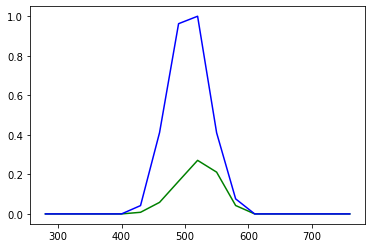

In [178]:
pandas.set_option('display.max_colwidth', None)
df = pandas.DataFrame.from_dict(RxnDictsNorm).T
d2f = pandas.DataFrame.from_dict(RxnDicts).T

y = [yi for yi in df['Rhodopsin photoisomerase Activity Spectrum (N)'] if isinstance(yi, float)]
ym = []
for yi in y:
    if yi == 0:
        ym.append(0)
    else:
        ym.append(1/yi)

y2 = d2f['Rhodopsin photoisomerase Activity Spectrum']
y2m = [yi for yi in y2 if isinstance(yi, float) ]

xm = [xi for xi in df['up'] if isinstance(xi, float) and not np.isnan(xi)]

plt.plot(xm, ym, 'g-')
plt.plot(xm, y2m, 'b-')

plt.show
df

In [179]:
df.to_csv(str(Here) + NameDir + typeR +" Coefficients Normalized.csv",encoding='utf-8-sig')
d2f.to_csv(str(Here) + NameDir + typeR +" Coefficients.csv",encoding='utf-8-sig')